#📈 US Regional Sales Exploration:

<img src="https://www.freepnglogos.com/uploads/usa-map-png/usa-map-united-states-russia-vector-graphic-pixabay-20.png" width="400">
<img src="https://cdn-icons-png.freepik.com/256/15246/15246483.png?semt=ais_white_label" width="300">


### 📂 Project Overview
This exploratory data analysis (EDA) notebook examines Acme Co.’s 2014–2018 USA sales records by focusing on:  

- **Data Profiling & Cleaning:** Checked dataset structure, addressed missing budget values, and ensured correct data types.  
- **Univariate & Bivariate Insights:** Investigated distributions for revenue, profit margin, and unit price; analyzed product, channel, and region breakdowns; and explored customer segmentation.  
- **Trends & Seasonality:** Visualized monthly and yearly sales patterns to identify recurring peaks and troughs.  
- **Outlier Analysis:** Detected extreme values in revenue and unit price to flag unusual transactions.  
- **Correlation & Segmentation:** Explored relationships between key metrics and grouped customers by revenue versus profit margin.  

---

### ❓ Problem Definition
Examine Acme Co.’s 2014–2018 sales data to uncover the main drivers of revenue and profit across products, sales channels, and regions. Identify seasonal patterns, unusual transactions, and areas where performance deviates from budgets. Use these insights to support pricing strategies, promotional planning, and regional market expansion.  

---

### 🎯 Objectives
- Determine top-performing products, channels, and regions contributing to revenue and profit.  
- Detect seasonal trends and anomalies for better operational planning.  
- Highlight pricing and margin risks through outlier analysis.  
- Provide insights to guide pricing, promotion, and expansion decisions.  

These analyses will inform the design of a **Power BI dashboard** to support strategic decisions and sustainable growth initiatives.

# 📥 Setup:

In [359]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [360]:
# Reading the excel file
sheets = pd.read_excel('/content/Regional Sales Dataset.xlsx', sheet_name = None)

In [361]:
df_sales = sheets['Sales Orders']
df_customers = sheets['Customers']
df_products = sheets['Products']
df_regions = sheets['Regions']
df_state_reg = sheets['State Regions']
df_budgets = sheets['2017 Budgets']

In [362]:
# Fixing the column names for State Regions
new_header = df_state_reg.iloc[0]
df_state_reg.columns = new_header
df_state_reg = df_state_reg[1:].reset_index(drop=True)

df_state_reg.head(5)

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


# 🔍 Data Profiling:

In [363]:
for name, df in sheets.items():
    print(f"{name} (shape: {df.shape})")
    print("Number of nulls per column:\n", df.isnull().sum())
    print("-" * 40)

Sales Orders (shape: (64104, 12))
Number of nulls per column:
 OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
dtype: int64
----------------------------------------
Customers (shape: (175, 2))
Number of nulls per column:
 Customer Index    0
Customer Names    0
dtype: int64
----------------------------------------
Regions (shape: (994, 15))
Number of nulls per column:
 id               0
name             0
county           0
state_code       0
state            0
type             0
latitude         0
longitude        0
area_code        0
population       0
households       0
median_income    0
land_area        0
water_area       0
time_zone        0
dtype: int64
------

# 🧹Data Cleaning and Wrangling:

In [364]:
# Merge Sales table with Customers

df = df_sales.merge(
    df_customers,
    how = 'left',
    left_on = 'Customer Name Index',
    right_on = 'Customer Index'
).drop(columns=['Customer Index'])

In [365]:
# Merge with Products

df = df.merge(
    df_products,
    how = 'left',
    left_on = 'Product Description Index',
    right_on = 'Index'
).drop(columns=['Index'])

In [366]:
# Merge with Regions

df = df.merge(
    df_regions,
    how = 'left',
    left_on = 'Delivery Region Index',
    right_on = 'id'
).drop(columns=['id'])

In [367]:
# Merge with State Regions

df = df.merge(
    df_state_reg[["State Code", 'Region']],
    how = 'left',
    left_on = 'state_code',
    right_on = 'State Code'
).drop(columns=['State Code'])

In [368]:
# Merge with Budgets

df = df.merge(
    df_budgets,
    how = 'left',
    on = 'Product Name')

In [369]:
# Convert all column names to lower case
df.columns = df.columns.str.lower()
df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone', 'region',
       '2017 budgets'], dtype=object)

In [370]:
# Keep only the columns we need for analysis
cols_to_keep = [
    'ordernumber',
    'orderdate',
    'customer names',
    'channel',
    'product name',
    'order quantity',
    'unit price',
    'line total',
    'total unit cost',
    'state_code',
    'state',
    'region',
    'latitude',
    'longitude',
    '2017 budgets'
]

In [371]:
# Select only relevant columns to simplify the DataFrame and focus on needed data
df = df[cols_to_keep]
df.head()

,ordernumber,orderdate,customer names,channel,product name,order quantity,unit price,line total,total unit cost,state_code,state,region,latitude,longitude,2017 budgets
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [372]:
# Renaming the columns
df = df.rename(columns={
    'ordernumber'      : 'order_number',
    'orderdate'        : 'order_date',
    'customer names'   : 'customer_name',
    'product name'     : 'product_name',
    'order quantity'   : 'quantity',
    'unit price'       : 'unit_price',
    'line total'       : 'revenue',
    'state_code'       : 'state',
    'state'            : 'state_name',
    'region'           : 'us_region',
    'latitude'         : 'lat',
    'longitude'        : 'lon',
    '2017 budgets'     : 'budget'
})
df.head()

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,total unit cost,state,state_name,us_region,lat,lon,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [373]:
# Set 'budget' to missing (NA) for all orders not from 2017
df.loc[df['order_date'].dt.year != 2017, 'budget'] = pd.NA

df[['order_date','product_name','revenue','budget']].head(10)

,order_date,product_name,revenue,budget
0,2014-01-01,Product 27,14994.6,NaN
1,2014-01-01,Product 20,25868.7,NaN
2,2014-01-01,Product 26,5869.2,NaN
3,2014-01-01,Product 7,16368.1,NaN
4,2014-01-01,Product 8,18331.2,NaN
5,2014-01-01,Product 23,57412.3,NaN
6,2014-01-01,Product 1,20120.1,NaN
7,2014-01-01,Product 25,10452.0,NaN
8,2014-01-01,Product 13,19262.5,NaN
9,2014-01-01,Product 14,34974.0,NaN


In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_number     64104 non-null  object        
 1   order_date       64104 non-null  datetime64[ns]
 2   customer_name    64104 non-null  object        
 3   channel          64104 non-null  object        
 4   product_name     64104 non-null  object        
 5   quantity         64104 non-null  int64         
 6   unit_price       64104 non-null  float64       
 7   revenue          64104 non-null  float64       
 8   total unit cost  64104 non-null  float64       
 9   state            64104 non-null  object        
 10  state_name       64104 non-null  object        
 11  us_region        64104 non-null  object        
 12  lat              64104 non-null  float64       
 13  lon              64104 non-null  float64       
 14  budget           15263 non-null  float

In [375]:
df.isnull().sum()

,0
order_number,0
order_date,0
customer_name,0
channel,0
product_name,0
quantity,0
unit_price,0
revenue,0
total unit cost,0
state,0


# 🛠️ Feature Engineering

In [376]:
# Calculate total cost for each line item
df['total_cost'] = df['quantity'] * df['total unit cost']

# Calculate profit as revenue minus total_cost
df['profit'] = df['revenue'] - df['total_cost']

# Calculate profit margin as a percentage
df['profit_margin_pct'] = (df['profit'] / df['revenue']) * 100

# Extract full month name from order_date for labeling (e.g., 'January', 'February')
df['order_month_name'] = df['order_date'].dt.month_name()

# Extract month number from order_date for correct sorting (1–12)
df['order_month_num'] = df['order_date'].dt.month

In [377]:
df.head()

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,total unit cost,state,state_name,us_region,lat,lon,budget,total_cost,profit,profit_margin_pct,order_month_name,order_month_num
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0,January,1
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0,January,1
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0,January,1
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0,January,1
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0,January,1


# 📊 Exploratory Data Analysis

### 🟣 1. Monthly Sales Trend Over Time:

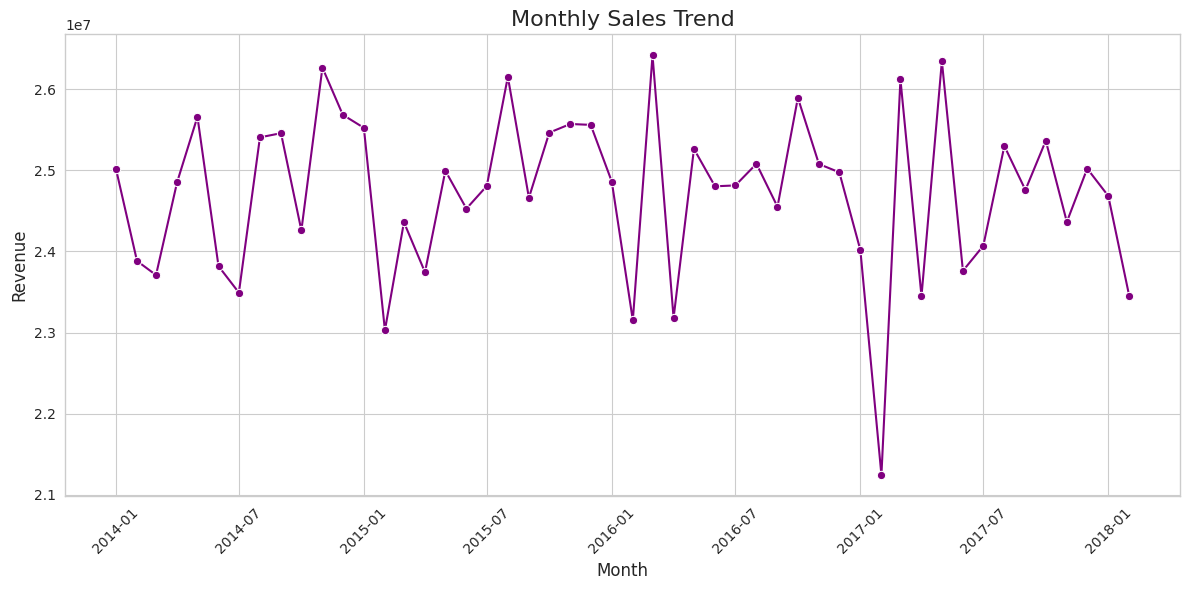

In [378]:
df['order_date'] = pd.to_datetime(df['order_date'])

# Total revenue by each month
monthly_sales = df.groupby(df['order_date'].dt.to_period('M'))['revenue'].sum().reset_index()
monthly_sales['order_date'] = monthly_sales['order_date'].dt.to_timestamp()

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='order_date', y='revenue', marker='o', color='purple')
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Sales show a stable pattern, generally fluctuating between **24M** *(USD)* and **26M** *(USD)*, with noticeable peaks in late spring to early summer (May–June) and dips in January each year.

The year-over-year trend is steady, indicating predictable seasonal demand.

An exception occurs in early 2017, where a pronounced drop in revenue appears as an outlier, suggesting a need to investigate potential factors such as market disruptions or poorly timed promotional campaigns.

### 🟡 2. Overall Monthly Sales Trend:

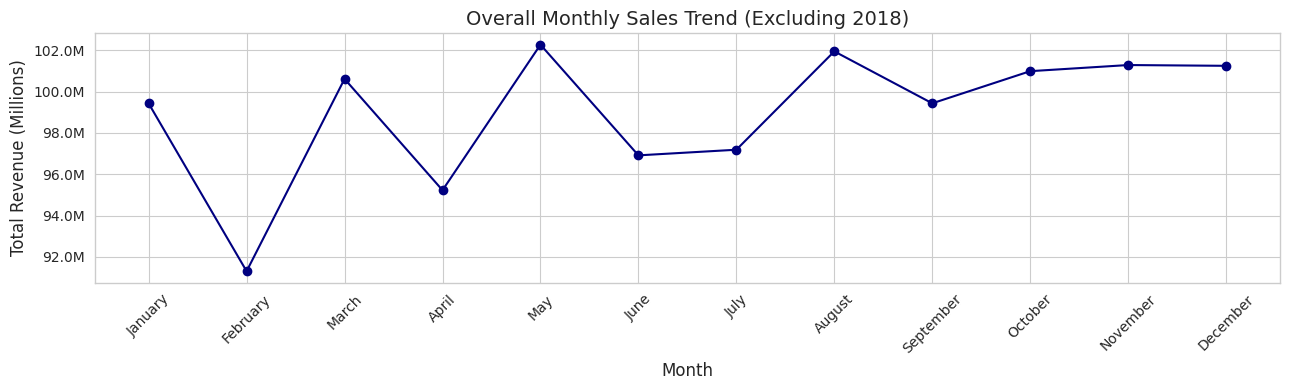

In [379]:
from matplotlib.ticker import FuncFormatter

# Exclude any 2018 orders (partial year) to avoid skewed monthly totals (Because we have only Jan and Feb data for 2018)
df_filtered = df[df['order_date'].dt.year != 2018]

# Group by month number and month name, sum revenue
monthly_sales = (
    df_filtered
    .groupby(['order_month_num', 'order_month_name'])['revenue']
    .sum()
    .sort_index()
)
# Plotting
plt.figure(figsize=(13, 4))
plt.plot(
    monthly_sales.index.get_level_values(1),
    monthly_sales.values,
    marker='o',
    color='navy'
)
# Format Y-axis in millions for readability
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

plt.title('Overall Monthly Sales Trend (Excluding 2018)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The overall monthly sales trend exhibits clear peaks in May and August, while February records the lowest sales.

From September to December, sales remain relatively stable, showing minimal variation and no abrupt changes during this period.

### 🔵 3.Top 10 Products by Revenue:

/tmp/ipython-input-29345424.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


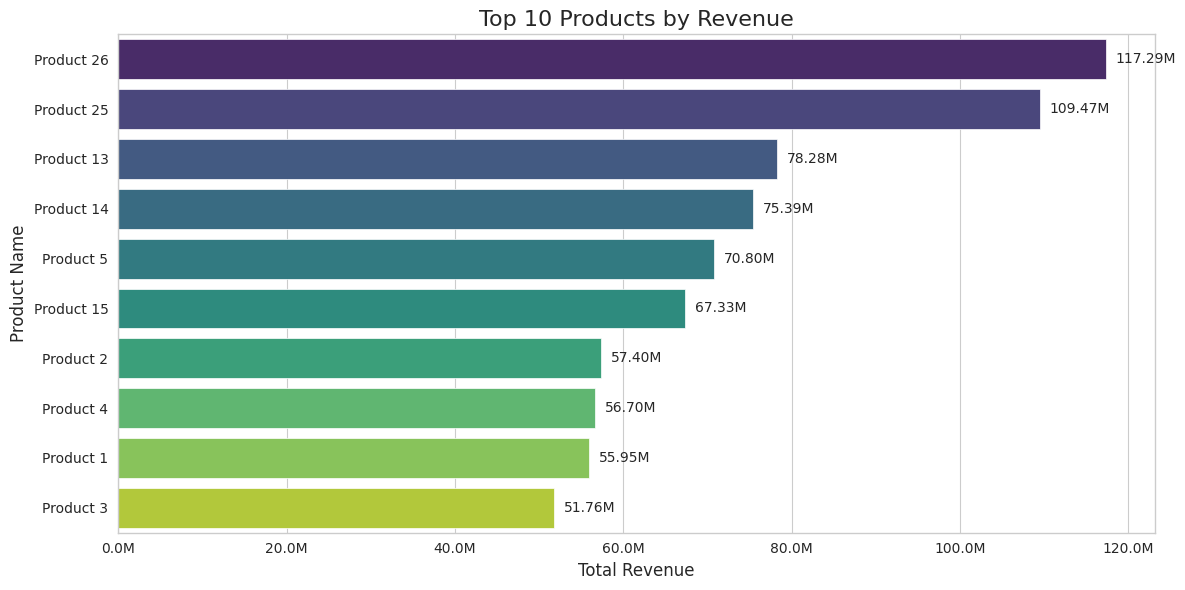

In [380]:
# Top 10 product by total revenue
top_products = (
    df.groupby('product_name')['revenue']
      .sum()
      .sort_values(ascending=False)
      .head(10)
      .reset_index()
)

plt.figure(figsize=(12,6))
barplot = sns.barplot(
    data=top_products,
    x='revenue',
    y='product_name',
    palette='viridis'
)

plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

for index, value in enumerate(top_products['revenue']):
    barplot.text(value + 0.01*top_products['revenue'].max(),
                 index,
                 f'{value/1e6:.2f}M',
                 va='center')

plt.title('Top 10 Products by Revenue', fontsize=16)
plt.xlabel('Total Revenue')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

Product 26 leads sales with $117M, followed closely by Product 25 at 109M.

Product 13 experiences a sharp drop, landing at $78M and ranking third.

Meanwhile, Product 3 records $51M, placing it tenth in overall sales.

### 🟢 4. Bottom 10 Products by Revenue:

/tmp/ipython-input-1085684953.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


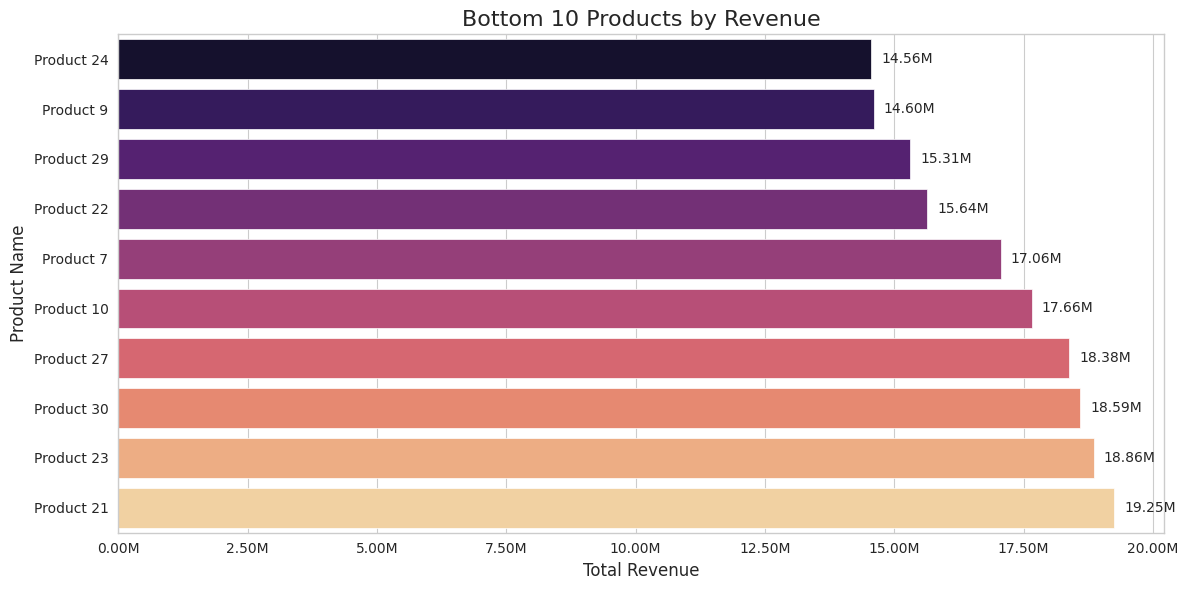

In [381]:
# Bottom 10 product by total revenue
bottom_products = (
    df.groupby('product_name')['revenue']
      .sum()
      .sort_values(ascending=True)
      .head(10)
      .reset_index()
)

# Plotting
plt.figure(figsize=(12,6))
barplot = sns.barplot(
    data=bottom_products,
    x='revenue',
    y='product_name',
    palette='magma'
)

plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1e6:.2f}M'))

for index, value in enumerate(bottom_products['revenue']):
    barplot.text(value + 0.01*bottom_products['revenue'].max(),
                 index,
                 f'{value/1e6:.2f}M',
                 va='center')

plt.title('Bottom 10 Products by Revenue', fontsize=16)
plt.xlabel('Total Revenue')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

Product 24 records the lowest revenue at $14M, followed closely by Products 9, 29, and 22.

### 🟠 5. Sales by Channel:

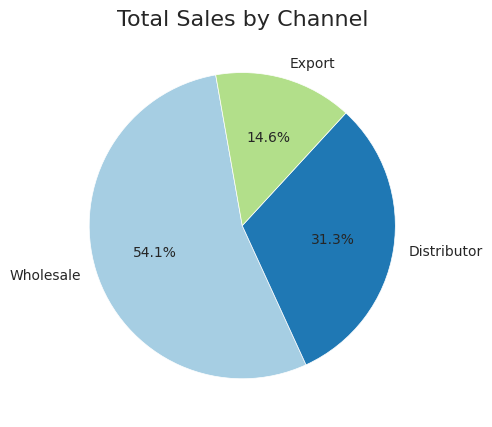

In [382]:
# Sales by channel
channel_sales = df.groupby('channel')['revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(5,5))
plt.pie(
    channel_sales,
    labels=channel_sales.index,
    autopct='%1.1f%%',
    startangle=100,
    colors=plt.cm.Paired.colors
)

plt.title('Total Sales by Channel', fontsize=16)
plt.tight_layout()
plt.show()

Wholesale represents 54% of total sales, followed by distributors at approximately 31% and exports at 15%, highlighting a strong dependence on domestic bulk channels.

To reduce concentration risk and diversify revenue streams, efforts should focus on expanding exports through targeted international marketing and strategic partnerships.

### 🟡 6. Average Order Value (AOV) Distribution:

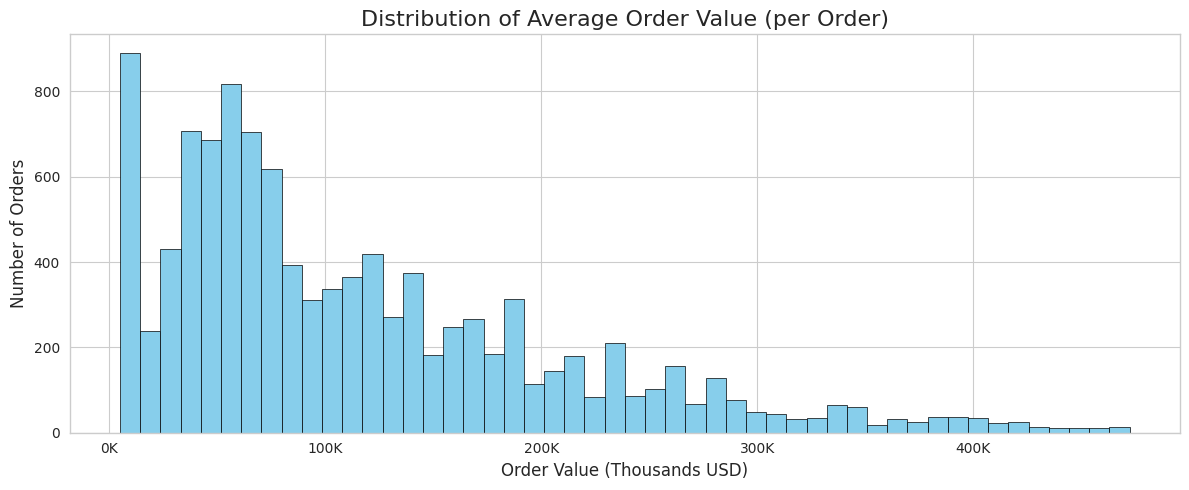

In [383]:
# Calculate total revenue per order (Average Order Value)
aov = df.groupby('order_number')['revenue'].sum()

plt.figure(figsize=(12,5))
plt.hist(
    aov,
    bins=50,
    color='skyblue',
    edgecolor='black'
)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1000:.0f}K'))
plt.title('Distribution of Average Order Value (per Order)', fontsize=16)
plt.xlabel('Order Value (Thousands USD)')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

The distribution of order values is strongly right-skewed, with the majority of orders falling between 20K and 120K, and a clear mode around 50K–60K. (USD)

A long tail of high-value orders extends up to 400K–500K, but these represent only a small fraction of total order volume.

### 🟤 7. Unit Price Distribution per Product:

/tmp/ipython-input-750911713.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


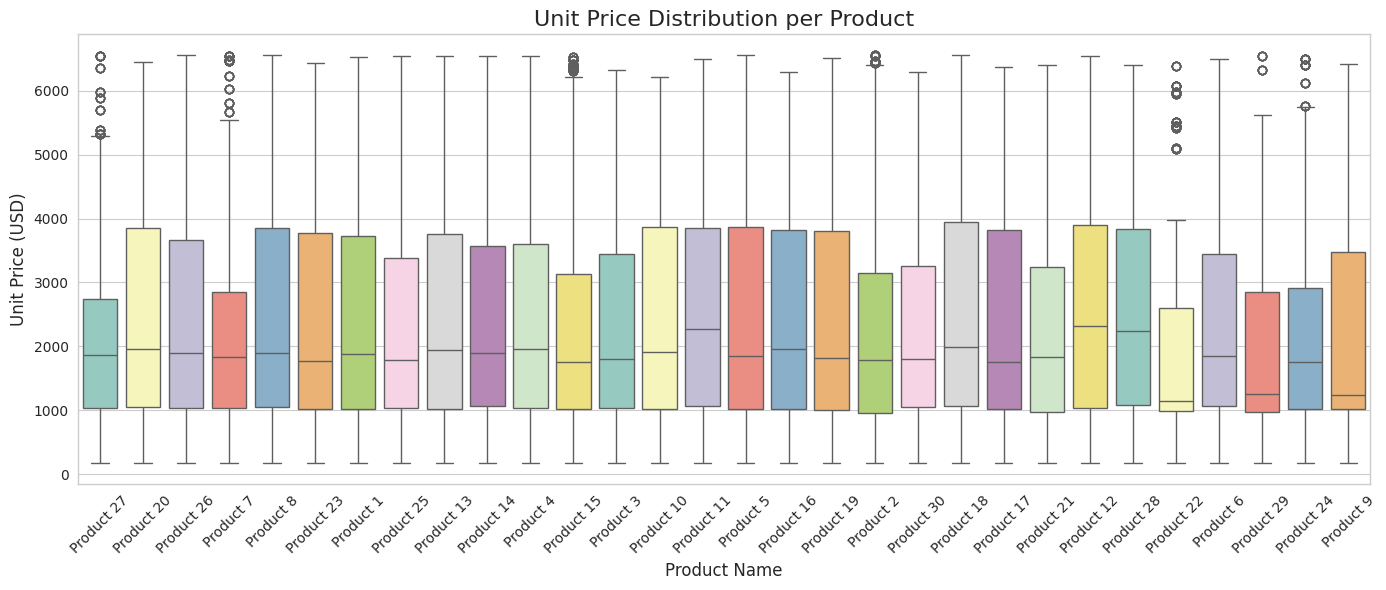

In [384]:
plt.figure(figsize=(14,6))

sns.boxplot(
    data=df,
    x='product_name',
    y='unit_price',
    palette='Set3'
)

plt.title('Unit Price Distribution per Product', fontsize=16)
plt.xlabel('Product Name')
plt.ylabel('Unit Price (USD)')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Products 8, 17, 27, 20, and 28 exhibit high-end revenue spikes—well above their upper whiskers—likely driven by bulk orders, special-edition releases, or premium bundles that temporarily boost earnings.

Conversely, extreme low-end outliers (around $100) for Products 20 and 27 indicate promotional giveaways or test SKUs that depress average prices.

To maintain accurate margin and pricing assessments, these outlier transactions should be excluded from average calculations.

Subsequently, evaluate whether such anomalies should be formalized as ongoing promotional strategies or phased out to stabilize pricing performance.

### 🟣 8. Top 10 States by Revenue and Order Count:

/tmp/ipython-input-184182772.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


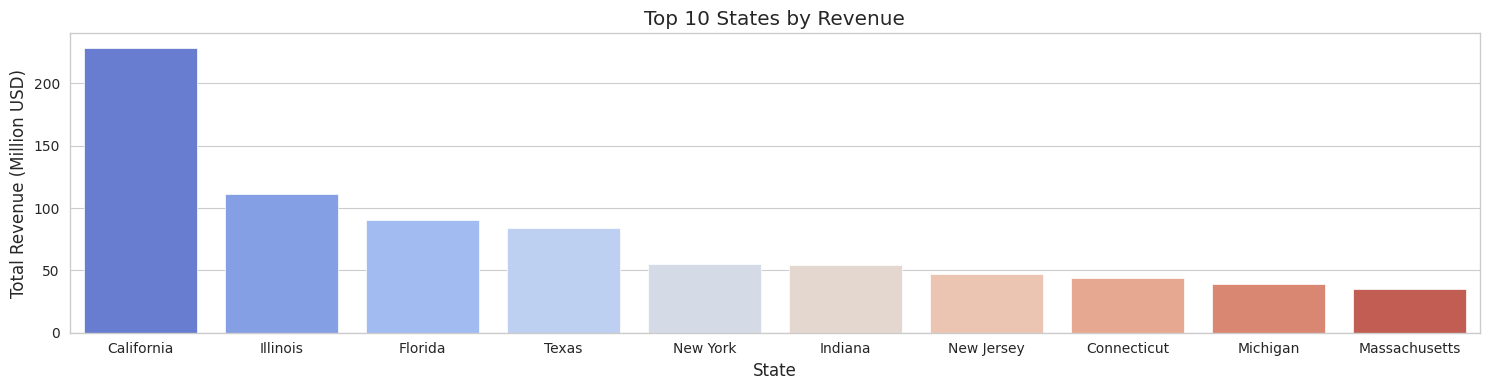

/tmp/ipython-input-184182772.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


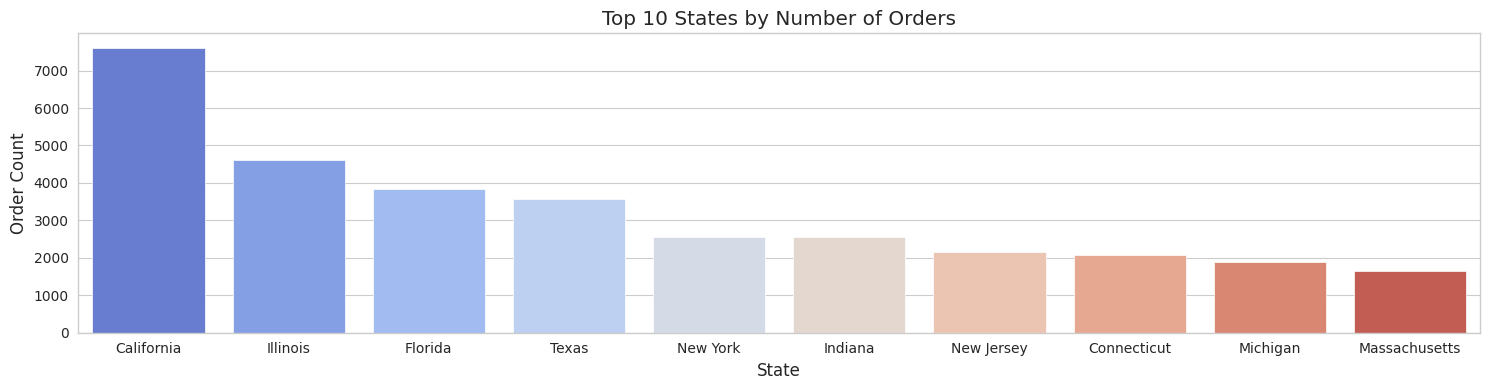

In [385]:
state_rev = df.groupby('state_name').agg(
    revenue=('revenue', 'sum'),
    orders=('order_number', 'nunique')
).sort_values('revenue', ascending=False).head(10)

# Plot 1: Top 10 states by revenue (scaled to millions)
plt.figure(figsize=(15, 4))
sns.barplot(
    x=state_rev.index,
    y=state_rev['revenue'] / 1e6,
    palette='coolwarm'
)
plt.title('Top 10 States by Revenue')
plt.xlabel('State')
plt.ylabel('Total Revenue (Million USD)')
plt.tight_layout()
plt.show()

# Plot 2: Top 10 states by number of orders
plt.figure(figsize=(15, 4))
sns.barplot(
    x=state_rev.index,
    y=state_rev['orders'],
    palette='coolwarm'
)
plt.title('Top 10 States by Number of Orders')
plt.xlabel('State')
plt.ylabel('Order Count')
plt.tight_layout()
plt.show()

California leads in total revenue, exceeding 200M, followed by Illinois, Florida, and Texas, each generating between 90M–100M with closely comparable performance.

The ranking is consistent when considering the number of orders as well, with California again in first place, surpassing 7,000 orders, while Illinois, Florida, and Texas maintain similar relative positions.

### 🔵 9. Average Profit Margin by Channel:

/tmp/ipython-input-3206985490.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


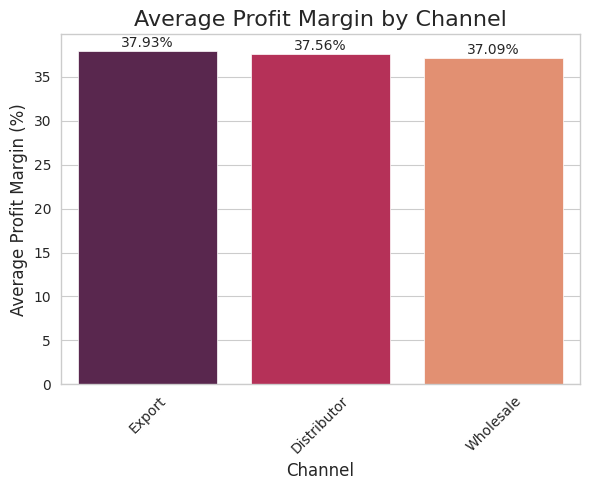

In [386]:
# Calculate average profit margin per channel
channel_margin = df.groupby('channel')['profit_margin_pct'].mean().sort_values(ascending=False)

plt.figure(figsize=(6,5))
barplot = sns.barplot(
    x=channel_margin.index,
    y=channel_margin.values,
    palette='rocket'
)

for index, value in enumerate(channel_margin.values):
    barplot.text(
        index,
        value + 0.5,
        f'{value:.2f}%',
        ha='center'
    )

plt.title('Average Profit Margin by Channel', fontsize=16)
plt.xlabel('Channel')
plt.ylabel('Average Profit Margin (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Export leads with an average profit margin of 37.93%, closely followed by Distributor at 37.56% and Wholesale at 37.09%.

The minimal difference (<0.2%) indicates consistently strong profitability across all channels.

This uniformity suggests well-controlled costs and effective pricing strategies throughout.

To maximize returns, focus on driving volume growth in Export while maintaining efficiency in Distributor and Wholesale channels.

### 🟢 10. Top and Bottom 10 Customers by Revenue:

/tmp/ipython-input-3551209335.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


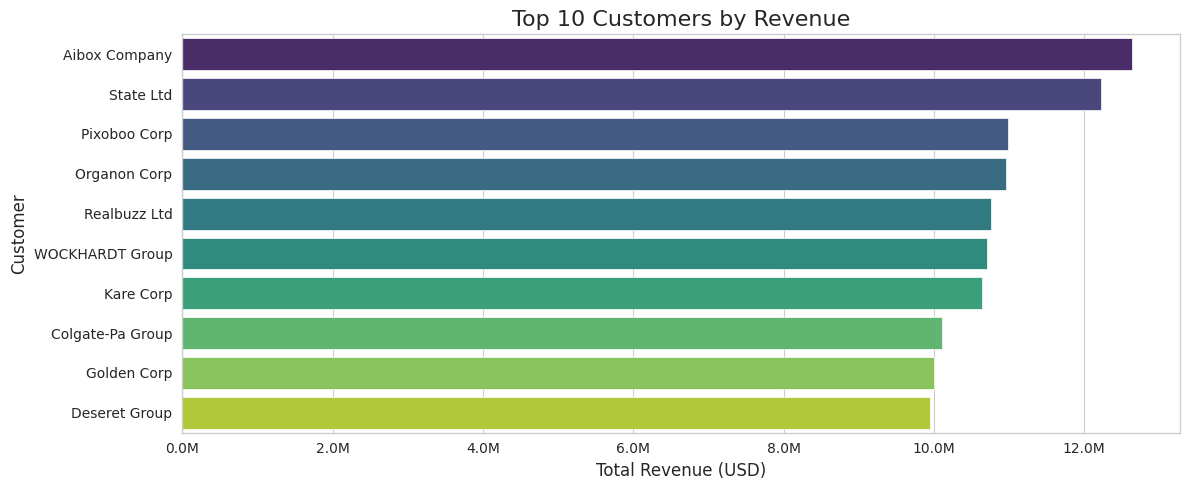

/tmp/ipython-input-3551209335.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


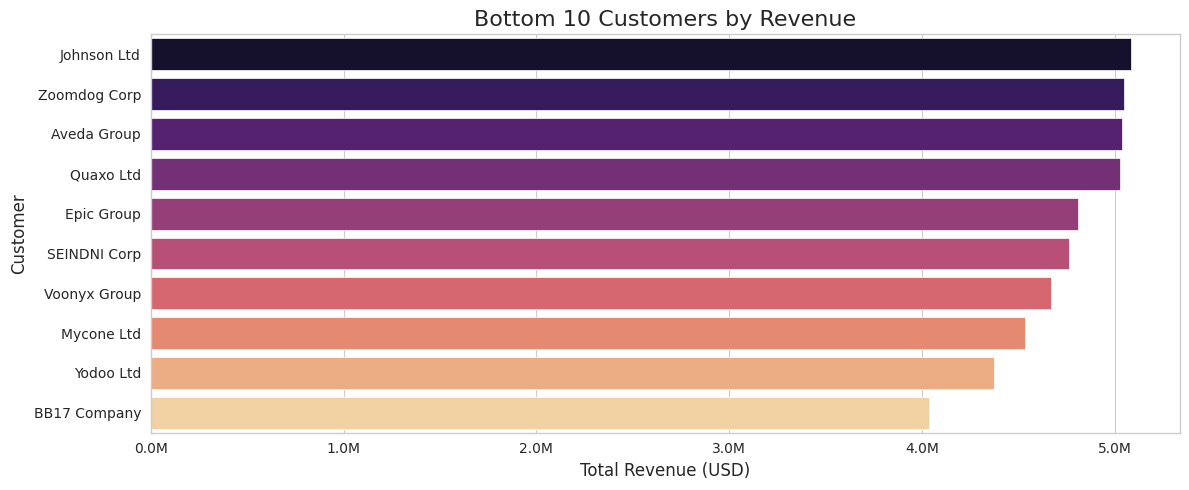

In [387]:
# Calculate total revenue per customer
customer_revenue = df.groupby('customer_name')['revenue'].sum().sort_values(ascending=False)

# Top 10 customers
top10 = customer_revenue.head(10).reset_index()

plt.figure(figsize=(12,5))
sns.barplot(
    x='revenue',
    y='customer_name',
    data=top10,
    palette='viridis'
)
plt.title('Top 10 Customers by Revenue', fontsize=16)
plt.xlabel('Total Revenue (USD)')
plt.ylabel('Customer')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
plt.tight_layout()
plt.show()

# Bottom 10 customers
bottom10 = customer_revenue.tail(10).reset_index()

plt.figure(figsize=(12,5))
sns.barplot(
    x='revenue',
    y='customer_name',
    data=bottom10,
    palette='magma'
)
plt.title('Bottom 10 Customers by Revenue', fontsize=16)
plt.xlabel('Total Revenue (USD)')
plt.ylabel('Customer')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
plt.tight_layout()
plt.show()

In the Top 10 customers by revenue, Aibox Company leads with 12.5M, closely followed by State Ltd at 12.2M.

Among the Bottom 10 customers, BB17 Company records the lowest revenue at 4M.

### 11. 🟠 Customer Segmentation: Revenue vs. Profit Margin:

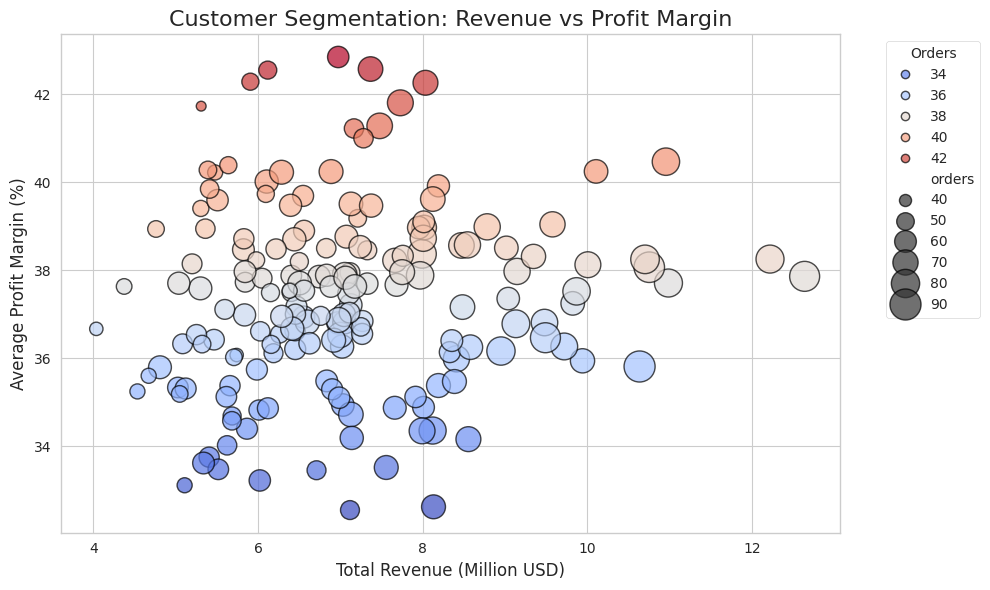

In [388]:
cust_summary = df.groupby('customer_name').agg(
    total_revenue=('revenue', 'sum'),
    total_profit=('profit', 'sum'),
    avg_margin=('profit_margin_pct', 'mean'),
    orders=('order_number', 'nunique')
).reset_index()

cust_summary['total_revenue_m'] = cust_summary['total_revenue'] / 1e6

plt.figure(figsize=(10,6))
scatter = sns.scatterplot(
    data=cust_summary,
    x='total_revenue_m',
    y='avg_margin',
    size='orders',
    hue='avg_margin',
    palette='coolwarm',
    sizes=(50, 500),
    alpha=0.7,
    edgecolor='k'
)

plt.title('Customer Segmentation: Revenue vs Profit Margin', fontsize=16)
plt.xlabel('Total Revenue (Million USD)')
plt.ylabel('Average Profit Margin (%)')

handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles=handles[1:len(cust_summary['orders'].unique())+1],
           labels=labels[1:len(cust_summary['orders'].unique())+1],
           title='Orders', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Customers generating over $10M in revenue maintain profit margins between 36–40%, indicating that higher scale does not materially impact profitability.

The majority of customers fall within the $6–10M revenue range and exhibit stable margins of approximately 34–40%, suggesting consistent pricing practices at this tier.

Customers below $6M show the widest margin variability (~33–43%), reflecting more volatile costs or discounts among smaller accounts.

Bubble sizes (representing order counts) grow with revenue, yet margin levels remain largely unaffected, reinforcing revenue as the primary driver of performance over order volume.

### 12. 🟡 Correlation Heatmap of Numeric Features:

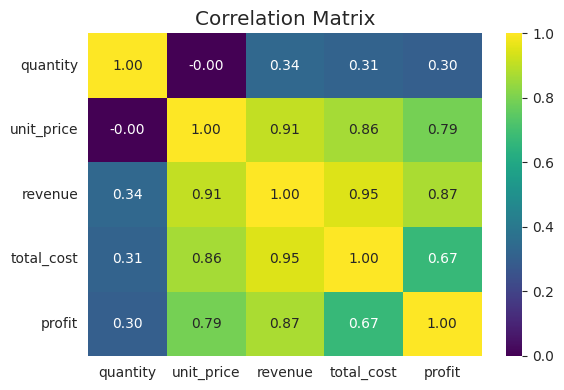

In [389]:
# List numeric columns to include in the correlation calculation
num_cols = ['quantity', 'unit_price', 'revenue', 'total_cost', 'profit']

# Calculate the correlation matrix for these numeric features
corr = df[num_cols].corr()

plt.figure(figsize=(6,4))

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='viridis'
)

plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

Profit and revenue are highly correlated (0.87), showing that higher sales generally lead to higher profits.

Unit price emerges as a critical driver, correlating 0.91 with revenue, 0.79 with profit, and 0.94 with cost, highlighting how pricing decisions impact both top-line revenue and expenses.

Cost has a strong relationship with revenue (0.85) but a moderate link to profit (0.58), indicating that while higher sales often incur higher costs, margins can still fluctuate.

Quantity shows almost no correlation with unit price or cost (~0.00) and only modest associations with revenue (0.34) and profit (0.30), suggesting that sales volume is a secondary factor compared to pricing.

### 🟤 13. Total Sales by US Region:

/tmp/ipython-input-3755473885.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


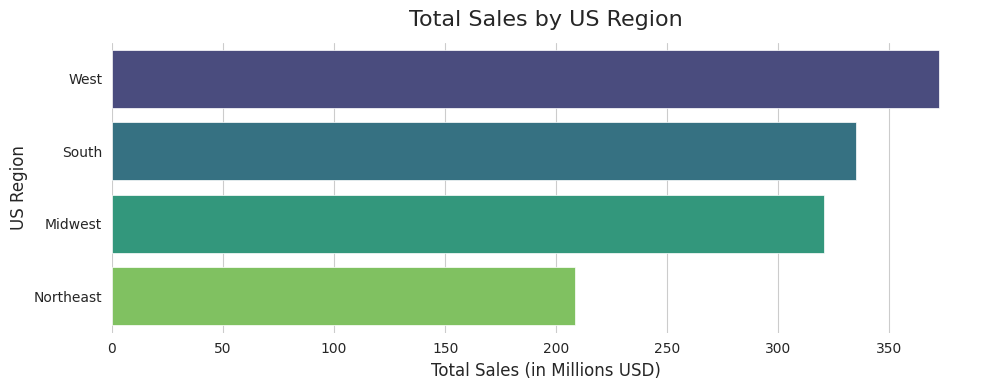

In [390]:
# Total Sales by US Region 1. Aggregate total sales by region (in millions)
region_sales = (
    df
    .groupby('us_region')['revenue']
    .sum()
    .sort_values(ascending=False)  # so bars go top→bottom
    / 1e6                         # convert to millions
)

# 2. Plot
plt.figure(figsize=(10, 4))
sns.barplot(
    x=region_sales.values,
    y=region_sales.index,
    palette='viridis'          # dark→light green
)

# 3. Formatting
plt.title('Total Sales by US Region', fontsize=16, pad=12)
plt.xlabel('Total Sales (in Millions USD)', fontsize=12)
plt.ylabel('US Region', fontsize=12)
plt.xticks(rotation=0)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

The West region leads with approximately $360M in sales (~35% of total), emphasizing its market dominance.

Both the South and Midwest contribute over $320M each (~32%), reflecting strong and consistent demand across central regions.

The Northeast lags at around $210M (~20%), highlighting potential for growth and targeted investment.

Recommended action: Focus on closing the Northeast gap through localized promotions and strategic partnerships, while maintaining successful strategies nationwide.

### 🟣 14. Profit Margin % vs. Unit Price:

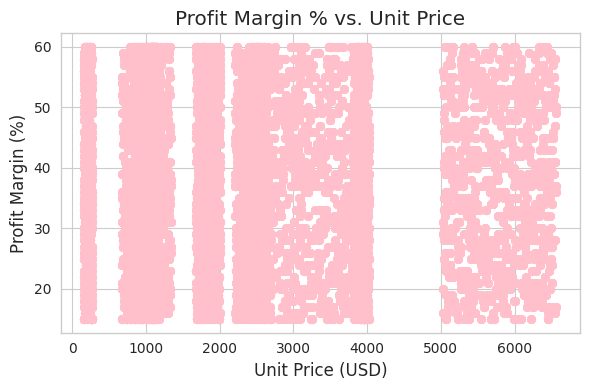

In [391]:
# Calculate profit margin percentage for each record
df['profit_margin_pct'] = (df['profit'] / df['revenue']) * 100

plt.figure(figsize=(6,4))

plt.scatter(
    df['unit_price'],
    df['profit_margin_pct'],
    alpha=0.6,
    color='pink'
)
plt.title('Profit Margin % vs. Unit Price')
plt.xlabel('Unit Price (USD)')
plt.ylabel('Profit Margin (%)')
plt.tight_layout()
plt.show()

Profit margins are mostly concentrated between ~18% and 60%, showing no clear correlation with unit price, which ranges from near 0 to over 6,500k.

Dense horizontal bands in the data indicate consistent margin tiers across a broad price spectrum, reflecting uniform pricing strategies.

Outliers below 18%, appearing at both low and high price points, may highlight cost inefficiencies or pricing issues that warrant further investigation.

### Saving the processed DataFrame:

In [392]:
df

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,total unit cost,state,state_name,us_region,lat,lon,budget,total_cost,profit,profit_margin_pct,order_month_name,order_month_num
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0,January,1
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0,January,1
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0,January,1
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0,January,1
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0,January,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,Dazzlesphe Corp,Wholesale,Product 26,12,1815.7,21788.4,980.478,PA,Pennsylvania,Northeast,40.15511,-74.82877,NaN,11765.736,10022.664,46.0,February,2
64100,SO - 0007706,2018-02-28,Yombu Corp,Export,Product 21,6,864.3,5185.8,579.081,IL,Illinois,Midwest,42.11030,-88.03424,NaN,3474.486,1711.314,33.0,February,2
64101,SO - 0007718,2018-02-28,Bath Group,Distributor,Product 13,11,3953.0,43483.0,2648.510,FL,Florida,South,26.24453,-80.20644,NaN,29133.610,14349.390,33.0,February,2
64102,SO - 0008084,2018-02-28,Linklinks Ltd,Distributor,Product 20,7,3959.7,27717.9,2930.178,NY,New York,Northeast,42.91002,-78.74182,NaN,20511.246,7206.654,26.0,February,2


In [393]:
# Export Final DataFrame to CSV
df.to_csv('Sales_data(EDA Exported).csv', index=False)

# 📝 **US Regional Sales Analysis – Insights Summary**

## Monthly Revenue Cycle
- Revenue remains stable between ≈23M–26.5M across 2014–2017, with no consistent seasonal spikes.  
- The sharpest decline (~21.2M) occurs in early 2017, indicating a potential one-time disruption.  

## Channel Mix
- **Wholesale**: 54%  
- **Distributors**: 31%  
- **Exports**: 15%  
*Insight:* Opportunity to scale international presence.  

## Top Products (Revenue in USD)
- **Product 26**: 118M  
- **Product 25**: 110M  
- **Product 13**: 78M  
- **Mid-tier products**: 68–75M  
- **Bottom performers**: 52–57M  

## Profit Margins
- Margins range from ≈18% to ≈60% with no strong correlation to unit price.  
- Dense horizontal bands indicate standardized pricing strategies across tiers.  

## Seasonal Volume
- No strong monthly pattern overall, but slight upticks appear in May–June.  
- Early 2017 dip (~$21.2M) warrants further investigation.  

## Regional Performance
- **California**: 230M revenue & 7,500+ orders  
- **Illinois, Florida, Texas**: 85–110M revenue & 3,500–4,500 orders
- **New York**: 54M revenue & 2,000+ orders  
- **Indiana**: 54M revenue & 2,000+ orders  
---

## **💡 Recommendations**
1. **Outlier Strategy:** Exclude or formalize bulk-order and promotional SKUs when calculating averages.  
2. **Margin Uplift:** Apply top-product pricing levers to mid/low tiers; reduce costs on underperformers.  
3. **Export Growth:** Invest in targeted overseas marketing and distributor partnerships.  
4. **Seasonal Planning:** Adjust spend toward January trough and May–June peak; investigate the 2017 anomaly.  
5. **Dashboard Prep:** Build aggregated tables for time series, channel mix, and product performance in Power BI.